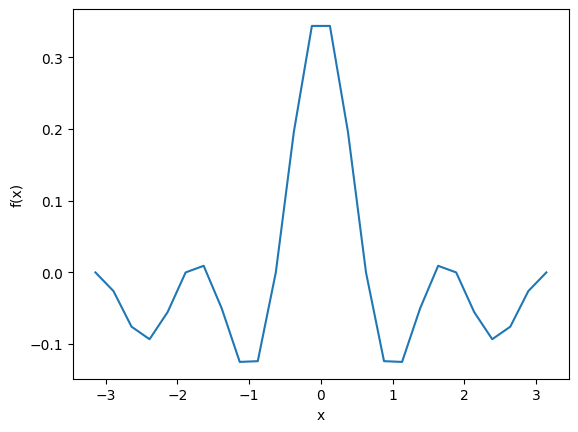

In [15]:
import pennylane.numpy as np
import matplotlib.pyplot as plt

domain = [-np.pi, np.pi]
omegas = np.array([1, 2, 3, 4])
coefficients = np.array([0.5, 0.5, 0.5, 0.5])

# Calculate the number of required samples to satisfy the Nyquist criterium
n_d = int(np.ceil(2 * np.max(np.abs(domain)) * np.max(omegas)))
# Sample the domain linearly
x = np.linspace(domain[0], domain[1], num=n_d)

# define our Fourier series f(x)
def f(x):
    return 1 / np.linalg.norm(omegas) * np.sum(coefficients * np.cos(omegas.T * x))

# evaluate f(x) on the domain samples
y = np.stack([f(sample) for sample in x])

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("figures/fourier_series_light.png", dpi=100, transparent=True)
plt.show()


In [16]:
from qml_essentials.model import Model

model = Model(
    n_qubits=4,
    n_layers=1,
    circuit_type="Circuit_19",
)

Epoch: 100, Cost: 0.0081
Epoch: 200, Cost: 0.0073
Epoch: 300, Cost: 0.0051
Epoch: 400, Cost: 0.0043
Epoch: 500, Cost: 0.0036
Epoch: 600, Cost: 0.0022
Epoch: 700, Cost: 0.0014
Epoch: 800, Cost: 0.0008
Epoch: 900, Cost: 0.0006
Epoch: 1000, Cost: 0.0001


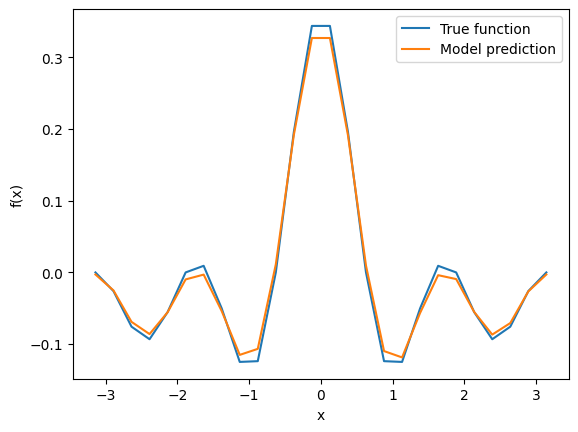

In [17]:
import pennylane as qml

opt = qml.AdamOptimizer(stepsize=0.01)

def cost_fct(params):
    y_hat = model(params=params, inputs=x, force_mean=True)

    return np.mean((y_hat - y) ** 2)

for epoch in range(1, 1001):
    model.params, cost_val = opt.step_and_cost(cost_fct, model.params)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Cost: {cost_val:.4f}")

plt.plot(x, y, label="True function")
plt.plot(x, model(params=model.params, inputs=x, force_mean=True), label="Model prediction")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig("figures/trained_series_light.png", dpi=100, transparent=True)
plt.show()
